In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pprint
import sklearn
%matplotlib inline

Connecting to google drive, where the source file is located

Source file path

In [3]:
df= pd.read_csv("silon.csv")

In [4]:
df.head()

,Date and hour,Avg Avg Wind Speed @ 80m [m/s]
0,01/01/2014 1:00,7.5023
1,01/01/2014 2:00,7.9678
2,01/01/2014 3:00,8.0371
3,01/01/2014 4:00,10.8764
4,01/01/2014 5:00,13.6990


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43823 entries, 0 to 43822
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date and hour                   43823 non-null  object 
 1   Avg Avg Wind Speed @ 80m [m/s]  43823 non-null  float64
dtypes: float64(1), object(1)
memory usage: 684.9+ KB


In [6]:
df.describe()

,Avg Avg Wind Speed @ 80m [m/s]
count,43823.000000
mean,4.599934
std,3.439017
min,0.273000
25%,2.325150
50%,3.632300
75%,5.822250
max,35.710000


Checking the null values

In [7]:
df.isnull().sum()

Date and hour                     0
Avg Avg Wind Speed @ 80m [m/s]    0
dtype: int64

Converting the time formats of the data 

In [14]:
dataset=df
dataset["Month"]=pd.to_datetime(df["Date and hour"]).dt.month
dataset["Year"]=pd.to_datetime(df["Date and hour"]).dt.year
dataset["Date"]=pd.to_datetime(df["Date and hour"]).dt.date
dataset["Time"]=pd.to_datetime(df["Date and hour"]).dt.time
dataset["Day"]=pd.to_datetime(df["Date and hour"]).dt.day_name()
dataset=df.set_index("Date and hour")
dataset.index=pd.to_datetime(dataset.index)
dataset.head(5)

,Avg Avg Wind Speed @ 80m [m/s],Month,Year,Date,Time,Day
Date and hour,,,,,,
2014-01-01 01:00:00,7.5023,1,2014,2014-01-01,01:00:00,Wednesday
2014-01-01 02:00:00,7.9678,1,2014,2014-01-01,02:00:00,Wednesday
2014-01-01 03:00:00,8.0371,1,2014,2014-01-01,03:00:00,Wednesday
2014-01-01 04:00:00,10.8764,1,2014,2014-01-01,04:00:00,Wednesday
2014-01-01 05:00:00,13.6990,1,2014,2014-01-01,05:00:00,Wednesday


In [15]:
print(df.Year.unique(),"\n")
print("total num of unique Year",df.Year.nunique(),"\n")

[2014 2015 2016 2017 2018] 

total num of unique Year 5 



No handles with labels found to put in legend.


Text(0.5, 1.0, 'wind speed vs timedate')

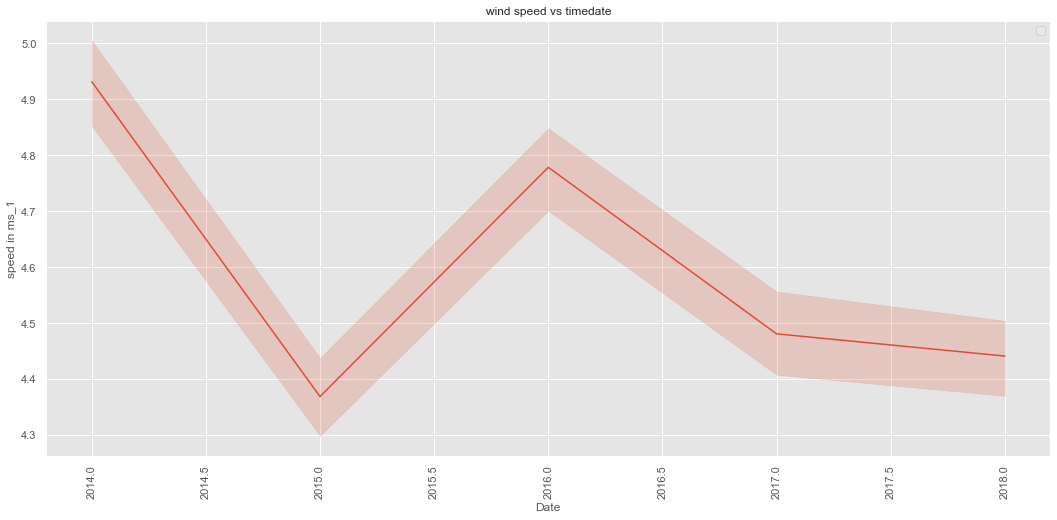

In [16]:
from matplotlib import style
fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))
style.use('ggplot')
sns.lineplot(x=dataset["Year"],y=dataset["Avg Avg Wind Speed @ 80m [m/s]"],data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.title("wind speed vs time")
plt.xlabel("Date")
plt.ylabel("speed in ms_1")
plt.grid(True)
plt.legend()
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
    
plt.title("wind speed vs timedate")    

<ipython-input-17-28230d6c3b14>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2015 = dataset["2015"]["Avg Avg Wind Speed @ 80m [m/s]"].to_list()
<ipython-input-17-28230d6c3b14>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  x_2015 = dataset["2015"]["Date"].to_list()
<ipython-input-17-28230d6c3b14>:13: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  y_2016 = dataset["2016"]["Avg Avg Wind Speed @ 80m [m/s]"].to_list()
<ipython-input-17-28230d6c3b14>:14: FutureWarning: Indexing a DataFr

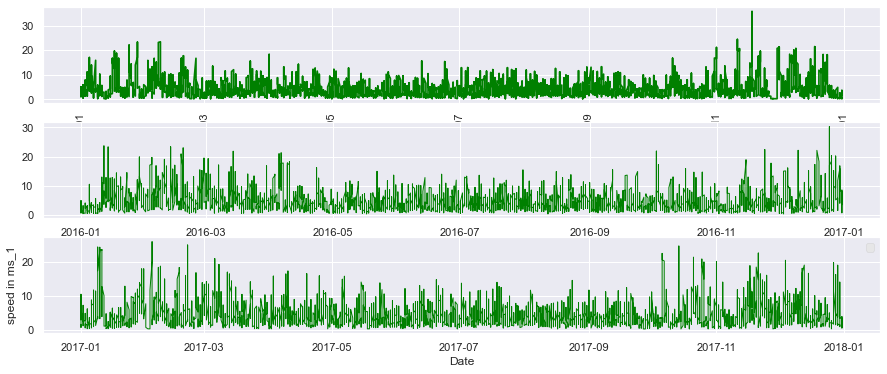

In [17]:
from matplotlib import style
fig=plt.figure()
ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)
style.use('ggplot')

y_2015 = dataset["2015"]["Avg Avg Wind Speed @ 80m [m/s]"].to_list()
x_2015 = dataset["2015"]["Date"].to_list()
ax1.plot(x_2015,y_2015, color="green", linewidth=1.7)


y_2016 = dataset["2016"]["Avg Avg Wind Speed @ 80m [m/s]"].to_list()
x_2016 = dataset["2016"]["Date"].to_list()
ax2.plot(x_2016, y_2016, color="green", linewidth=1)


y_2017 = dataset["2017"]["Avg Avg Wind Speed @ 80m [m/s]"].to_list()
x_2017 = dataset["2017"]["Date"].to_list()
ax3.plot(x_2017, y_2017, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("")
plt.xlabel("Date")
plt.ylabel("speed in ms_1")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

C:\Users\Unique-Pc\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'wind speed distribution')

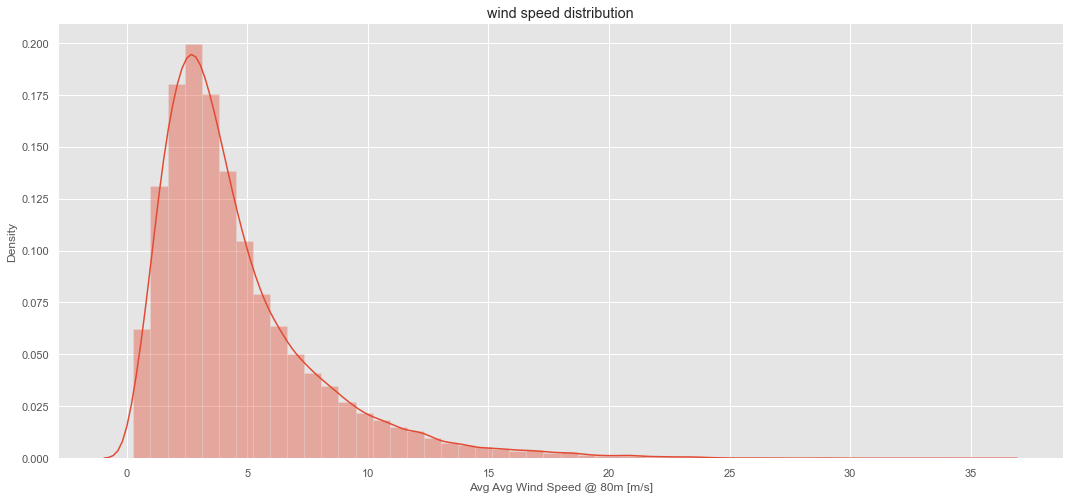

In [12]:
sns.distplot(dataset["Avg Avg Wind Speed @ 80m [m/s]"])
plt.title("wind speed distribution")


In [12]:
pd.plotting.register_matplotlib_converters()

No handles with labels found to put in legend.


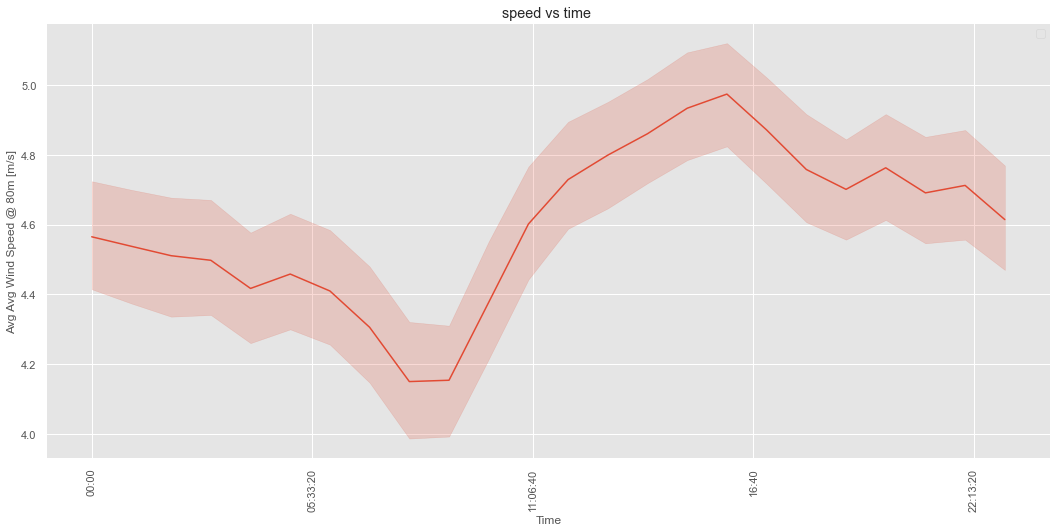

In [13]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["Avg Avg Wind Speed @ 80m [m/s]"], data=df)
plt.title("speed vs time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Resampleing Data

In [14]:
NewDataSet = dataset.resample('D').mean()


In [15]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (43823, 6)
New  Dataset  (1826, 3)


In [16]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [17]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (1766, 1)
Test Set Shape  (100, 3)


In [18]:
type(Training_Set.values)

numpy.ndarray

In [19]:
from sklearn.preprocessing import MinMaxScaler

Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [20]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(1706, 60, 1)
(1706, 1)


In [21]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(1706, 60, 1)

MODEL

In [22]:
from keras.models import Sequential

In [23]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [24]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:

regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
54/54 [==============================] - 8s 141ms/step - loss: 0.0250
Epoch 2/50
54/54 [==============================] - 7s 134ms/step - loss: 0.0209
Epoch 3/50
54/54 [==============================] - 7s 136ms/step - loss: 0.0206
Epoch 4/50
54/54 [==============================] - 7s 124ms/step - loss: 0.0205
Epoch 5/50
54/54 [==============================] - 7s 131ms/step - loss: 0.0214
Epoch 6/50
54/54 [==============================] - 6s 117ms/step - loss: 0.0204
Epoch 7/50
54/54 [==============================] - 6s 117ms/step - loss: 0.0206
Epoch 8/50
54/54 [==============================] - 6s 118ms/step - loss: 0.0203
Epoch 9/50
54/54 [==============================] - 6s 119ms/step - loss: 0.0202
Epoch 10/50
54/54 [==============================] - 7s 126ms/step - loss: 0.0200
Epoch 11/50
54/54 [==============================] - 6s 115ms/step - loss: 0.0206
Epoch 12/50
54/54 [==============================] - 6s 116ms/step - loss: 0.0199
Epoch 13/50
54/54 [======

TEST DATA

In [26]:
TestData.head(2)

,Avg Avg Wind Speed @ 80m [m/s],Month,Year
Date and hour,,,
2018-09-23,3.599358,9,2018
2018-09-24,6.367446,9,2018


In [27]:

TestData.shape

(100, 3)

In [28]:
Df_Total = pd.concat((NewDataSet[["Avg Avg Wind Speed @ 80m [m/s]"]], TestData[["Avg Avg Wind Speed @ 80m [m/s]"]]), axis=0)

In [29]:
Df_Total.shape

(1926, 1)

In [30]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [31]:

inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_speed= regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_speed = sc.inverse_transform(predicted_speed)

In [32]:
True_Speed = TestData["Avg Avg Wind Speed @ 80m [m/s]"].to_list()
Predicted_Speed  = predicted_speed
dates = TestData.index.to_list()

In [33]:

Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueSpeed": True_Speed,
    "PredictedSpeed":[x[0] for x in Predicted_Speed ]
})

FUTURE PREDICTED

In [34]:
Machine_Df

,Date,TrueSpeed,PredictedSpeed
0,2018-09-23,3.599358,4.441577
1,2018-09-24,6.367446,4.206448
2,2018-09-25,3.467825,4.770920
3,2018-09-26,3.225175,4.229883
4,2018-09-27,4.733517,4.068090
...,...,...,...
95,2018-12-27,3.621600,4.059881
96,2018-12-28,2.756988,4.236499
97,2018-12-29,3.005112,4.127888
98,2018-12-30,8.852525,4.127008


In [35]:
True_Speed= TestData["Avg Avg Wind Speed @ 80m [m/s]"].to_list()
Predicted_Speed  = [x[0] for x in Predicted_Speed ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


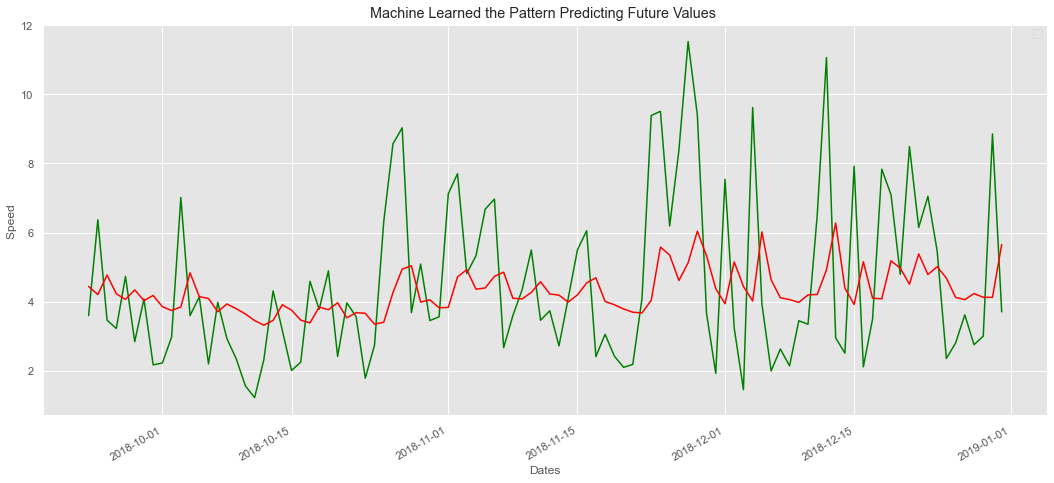

In [36]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_Speed

y1 = Predicted_Speed

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Speed ")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()